# Import all libraries and Load Data

In [434]:
# Import libraries
import numpy as np 
import pandas as pd 


# Load Data into memory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hackathon-qualification/Starter Notebook.ipynb
/kaggle/input/hackathon-qualification/archive/sample_submission.csv
/kaggle/input/hackathon-qualification/archive/train.csv
/kaggle/input/hackathon-qualification/archive/test.csv


In [435]:
train_df = pd.read_csv('/kaggle/input/hackathon-qualification/archive/train.csv')
print("Data loaded successfully!")

Data loaded successfully!


In [436]:
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


## Data Cleaning

In [437]:
train_df.shape

(188533, 13)

In [438]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [439]:
train_df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [440]:
train_df["accident"].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [441]:
# Check the NaN value counts and others
train_df["clean_title"].value_counts(dropna=False)

clean_title
Yes    167114
NaN     21419
Name: count, dtype: int64

In [442]:
train = train_df.copy()

In [443]:
# Drop all rows with null values 
# train = train_df.copy()
# train.dropna(inplace= True)
# train.head()

In [444]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

### Clean Model Column

In [445]:
train["model"].head(50)

0                     Cooper S Base
1                             LS V8
2                 Silverado 2500 LT
3                  G90 5.0 Ultimate
4                       Metris Base
5                     A6 2.0T Sport
6                         A8 L 3.0T
7                Silverado 1500 1LZ
8                         F-150 XLT
9                           M4 Base
10                       Camaro 1LT
11                    Model S P100D
12            Escalade ESV Platinum
13             S4 3.0T Premium Plus
14    Rover Range Rover P530 SE SWB
15                       AMG C 63 S
16                     Yukon Denali
17                Rover Defender SE
18                       Tundra SR5
19                    AMG C 63 Base
20                 Rover Defender S
21                  Equus Signature
22                  Mustang Premium
23                          A8 L 55
24                 XC70 T6 Platinum
25                  Sequoia Limited
26                        F-250 XLT
27                 G90 5.0 U

In [446]:
train["model"].nunique()

1897

In [447]:
train["model"].str.strip()
train["model"].replace(r'\s+', ' ', regex= True)
train["model"].replace(r'^[\.\-,\s]+$',' ', regex= True).head(50)

0                     Cooper S Base
1                             LS V8
2                 Silverado 2500 LT
3                  G90 5.0 Ultimate
4                       Metris Base
5                     A6 2.0T Sport
6                         A8 L 3.0T
7                Silverado 1500 1LZ
8                         F-150 XLT
9                           M4 Base
10                       Camaro 1LT
11                    Model S P100D
12            Escalade ESV Platinum
13             S4 3.0T Premium Plus
14    Rover Range Rover P530 SE SWB
15                       AMG C 63 S
16                     Yukon Denali
17                Rover Defender SE
18                       Tundra SR5
19                    AMG C 63 Base
20                 Rover Defender S
21                  Equus Signature
22                  Mustang Premium
23                          A8 L 55
24                 XC70 T6 Platinum
25                  Sequoia Limited
26                        F-250 XLT
27                 G90 5.0 U

In [448]:
# Clean Model Column Function
def clean_model_col(col):
    s= col.astype(str).str.strip()
    # Collapse multiple spaces into 1
    s= s.str.replace(r'\s+', ' ', regex= True)
    # Remove rows that are only junk like ". , -" or spaces
    s= s.str.replace(r'^[\.\-,\s]+$', '', regex= True)
    return s

In [449]:
# Clean the whole model column in-place
train["model"] = clean_model_col(train["model"])
train["model"].value_counts()

model
F-150 XLT                        2945
M3 Base                          2229
Camaro 2SS                       1709
M4 Base                          1622
Mustang GT Premium               1526
                                 ... 
ForTwo Pure                         2
X5 3.0i                             1
X5 xDrive40e                        1
XLR Base                            1
Integra w/A-Spec Tech Package       1
Name: count, Length: 1897, dtype: int64

In [450]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

### Clean Fuel_type

In [451]:
train["fuel_type"].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [452]:
# Check the count of "Not_supported" values
train["fuel_type"].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [453]:
# # Drop noisy rows (Not supported and '-')
# train = train[~train["fuel_type"].isin(["–", "not supported"])]
# train["fuel_type"].unique()

In [454]:
def clean_fuel_col(col):
    s= col.str.strip()
    junk = ["–", "nan"]
    s = s[~s.isin(junk)]
    return s

In [455]:
# Test the function created
fuel_col= train["fuel_type"]
fuel_col= clean_fuel_col(fuel_col)
fuel_col.unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [456]:
# Clean the whole fuel_type column in-place
train["fuel_type"] = clean_fuel_col(train["fuel_type"])
train["fuel_type"].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

### Clean Engine Column

In [457]:
train["engine"].value_counts()

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           2841
2.0L I4 16V GDI DOHC Turbo                             2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          2451
                                                       ... 
151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid        1
184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capability       1
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel               1
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas       1
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: count, Length: 1117, dtype: int64

In [458]:
train["engine"].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

In [459]:
#print(list(train["engine"].unique()))

### Clean Transmission Column

In [460]:
train["transmission"].head(50)

0                                A/T
1                                A/T
2                                A/T
3     Transmission w/Dual Shift Mode
4                        7-Speed A/T
5                                A/T
6                        8-Speed A/T
7                                A/T
8                 10-Speed Automatic
9     Transmission w/Dual Shift Mode
10                               A/T
11                       1-Speed A/T
12                       6-Speed A/T
13                               A/T
14                               A/T
15                       7-Speed A/T
16                      10-Speed A/T
17                       8-Speed A/T
18                       7-Speed A/T
19                       9-Speed A/T
20                 8-Speed Automatic
21                       8-Speed A/T
22                       6-Speed A/T
23    Transmission w/Dual Shift Mode
24                       6-Speed A/T
25                       6-Speed A/T
26                       6-Speed A/T
2

In [461]:
train["transmission"].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [462]:
train["transmission"].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [463]:
def clean_trans_col(col):
    s= col.astype(str).str.strip().str.title()
    
    # Fix the inconsistent CVT variants
    s= s.replace({
        "Automatic Cvt": "CVT",
        "Cvt Transmission": "CVT",
        "Cvt-F": "CVT",
    })
    # Clean the Automatics variants as well as the Speed differently
    s = s.str.replace(r"(\d+)\s*[- ]?\s*Speed\s*(A/T|At|Automatic)", 
                      r"\1-Speed Automatic", regex=True)
    
    # Normalize Manual variants while keeping the speed
    s = s.str.replace(r"(\d+)\s*[- ]?\s*Speed\s*(M/T|Mt|Manual|At/Mt)", 
                      r"\1-Speed Manual", regex=True)

    # Normalize plain A/T and M/T (without speed)
    s = s.replace({"A/T": "Automatic", "M/T": "Manual"})

    #Other weird descriptions that imply automatic
    replacements = {
        # "Transmission W/Dual Shift Mode": "Automatic",
        # "Transmission Overdrive Switch": "Automatic",
        # "Single-Speed Fixed Gear": "Automatic"
        "7-Speed Automatic With Auto-Shift": "7-Speed Automatic",
        "6-Speed Automatic With Auto-Shift": "6-Speed Automatic",
        "9-Speed Automatic With Auto-Shift": "9-Speed Automatic",
        "10-Speed Automatic With Overdrive": "10-Speed Automatic",
        "6-Speed Electronically Controlled Automatic With O": "6-Speed Automatic",
        "7-Speed Dct Automatic": "7-Speed Automatic",
        "6-Speed Automatic/Mt": "6-Speed Manual",
    }

    s= s.replace(replacements)

    # Drop junk
    junks = ["–", "F", "2"]
    s= s[~s.isin(junks)]
    return s

In [464]:
transmission= train["transmission"]
trans_new= clean_trans_col(transmission)

In [465]:
train["transmission"].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [466]:
trans_new.value_counts()

transmission
Automatic                            60595
8-Speed Automatic                    29096
6-Speed Automatic                    20985
Transmission W/Dual Shift Mode       19255
7-Speed Automatic                    12492
6-Speed Manual                       12266
10-Speed Automatic                   11248
9-Speed Automatic                     6224
5-Speed Automatic                     3376
CVT                                   2834
4-Speed Automatic                     2594
5-Speed Manual                        2409
1-Speed Automatic                     2234
Manual                                1206
8-Speed Automatic With Auto-Shift      549
7-Speed Manual                         506
Transmission Overdrive Switch          156
2-Speed Automatic                       93
Variable                                66
7-Speed                                 29
8-Speed Manual                          28
6-Speed                                 27
Single-Speed Fixed Gear                 1

In [467]:
# Clean the whole transmission column in-place
train["transmission"] = clean_trans_col(train["transmission"])
train["transmission"].value_counts()

transmission
Automatic                            60595
8-Speed Automatic                    29096
6-Speed Automatic                    20985
Transmission W/Dual Shift Mode       19255
7-Speed Automatic                    12492
6-Speed Manual                       12266
10-Speed Automatic                   11248
9-Speed Automatic                     6224
5-Speed Automatic                     3376
CVT                                   2834
4-Speed Automatic                     2594
5-Speed Manual                        2409
1-Speed Automatic                     2234
Manual                                1206
8-Speed Automatic With Auto-Shift      549
7-Speed Manual                         506
Transmission Overdrive Switch          156
2-Speed Automatic                       93
Variable                                66
7-Speed                                 29
8-Speed Manual                          28
6-Speed                                 27
Single-Speed Fixed Gear                 1

In [468]:
#train.dropna(inplace=True)
#train.isnull().sum()

### Clean ext_col columns

In [469]:
train["ext_col"].nunique()

319

In [470]:
# Clean ext_col cloumn function
def ext_col(col):
    s= col.str.strip().str.title()
    
    # Remove all this junk
    junks = ["–", "C / C"]
    s= s[~s.isin(junks)]
    # Mapping rules for base colors
    color_map = {
        "Black": "Black",
        "Ebony": "Black",
        "Onyx": "Black",
        "Raven": "Black",
        "Noir": "Black",
        "Obsidian": "Black",
        "Midnight": "Black",
        "Sapphire": "Black",

        "White": "White",
        "Pearl": "White",
        "Snow": "White",
        "Ivory": "White",
        "Alpine": "White",

        "Gray": "Gray",
        "Grey": "Gray",
        "Graphite": "Gray",
        "Slate": "Gray",
        "Granite": "Gray",
        "Titanium": "Gray",
        "Magnetite": "Gray",
        "Silver": "Silver",
        "Platinum": "Silver",
        "Chrome": "Silver",

        "Red": "Red",
        "Burgundy": "Red",
        "Crimson": "Red",
        "Ruby": "Red",
        "Garnet": "Red",
        "Maroon": "Red",

        "Blue": "Blue",
        "Navy": "Blue",
        "Aqua": "Blue",
        "Teal": "Blue",
        "Blu": "Blue",
        "Blue Metallic": "Blue",
        "BLUE": "Blue",

        "Green": "Green",
        "Emerald": "Green",
        "Jungle": "Green",

        "Yellow": "Yellow",
        "Gold": "Gold",
        "Beige": "Beige",
        "Brown": "Brown",
        "Orange": "Orange",
        "Purple": "Purple",
        "Pink": "Pink"
    }

    # Apply mapping by checking keywords
    def map_color(x):
        for k, v in color_map.items():
            if k in x:
                return v
        return None
    s= s.apply(map_color)
    #s= s.dropna()
    return s

In [471]:
ext_colour= train["ext_col"]
ext_colour = ext_col(ext_colour)

In [472]:
ext_colour.value_counts()

ext_col
Black     54398
White     49060
Gray      27292
Silver    18743
Blue      15809
Red       11425
Green      2948
Gold       1668
Brown      1185
Orange     1148
Beige      1096
Yellow      994
Purple      354
Pink         23
Name: count, dtype: int64

In [473]:
# Clean the whole ext_col column in-place
train["ext_col"] = ext_col(train["ext_col"])
train["ext_col"].value_counts()

ext_col
Black     54398
White     49060
Gray      27292
Silver    18743
Blue      15809
Red       11425
Green      2948
Gold       1668
Brown      1185
Orange     1148
Beige      1096
Yellow      994
Purple      354
Pink         23
Name: count, dtype: int64

In [474]:
train.dropna(inplace=True)
train.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [475]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160840 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            160840 non-null  int64 
 1   brand         160840 non-null  object
 2   model         160840 non-null  object
 3   model_year    160840 non-null  int64 
 4   milage        160840 non-null  int64 
 5   fuel_type     160840 non-null  object
 6   engine        160840 non-null  object
 7   transmission  160840 non-null  object
 8   ext_col       160840 non-null  object
 9   int_col       160840 non-null  object
 10  accident      160840 non-null  object
 11  clean_title   160840 non-null  object
 12  price         160840 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 17.2+ MB


### Clean int_col columns

In [476]:
# Count exact matches
count_parchment = (train["int_col"] == "BEIGE").sum()
print(count_parchment)

1


In [477]:
train["int_col"].value_counts().head(50)

int_col
Black                    92805
Beige                    23537
Gray                     20022
Brown                     5627
Red                       4712
White                     3538
–                         3434
Jet Black                 1318
Orange                     909
Ebony                      725
Blue                       674
Silver                     392
Gold                       331
Global Black               214
Green                      176
Diesel Gray / Black        159
Medium Stone               126
Medium Earth Gray          118
Black Onyx                  81
Sandstone                   69
Charcoal                    65
Black / Express Red         60
Hotspur Hide                57
Graphite                    57
White / Brown               56
Charles Blue                55
Rioja Red                   54
Yellow                      51
Light Slate                 50
Tan                         48
Charcoal Black              46
Ceramic                     43


In [478]:
def clean_int_col(col: pd.Series) -> pd.Series:
    s = col.astype(str).str.strip().str.title()
    
    # Drop junk rows
    junks = ["–"]
    s = s[~s.isin(junks)]
    
    # Mapping rules for base colors
    color_map = {
        "Black": "Black",
        "Ebony.": "Black",
        "Blk": "Black",
        "Ebony": "Black",
        "Onyx": "Black",
        "Carbon": "Black",
        "Obsidian": "Black",
        "Jet": "Black",
        "Midnight": "Black",
        "Raven": "Black",
        "Blk": "Black",
        
        "Gray": "Gray",
        "Slate": "Gray",
        "Graphite": "Gray",
        "Titan": "Gray",
        "Ash": "Gray",
        "Stone": "Gray",
        "Rock": "Gray",
        "Charcoal": "Gray",
        "Platinum": "Gray",

        "Beige": "Beige",
        "Almond": "Beige",
        "Macchiato": "Beige",
        "Camel": "Beige",
        "Oyster": "Beige",
        "Ivory": "Beige",
        "Linen": "Beige",
        "Cashmere": "Beige",
        "Parchment": "Beige",

        "Brown": "Brown",
        "Walnut": "Brown",
        "Chestnut": "Brown",
        "Saddle": "Brown",
        "Mocha": "Brown",
        "Espresso": "Brown",
        "Cappuccino": "Brown",
        "Brandy": "Brown",
        "Roast": "Brown",

        "Red": "Red",
        "Hotspur": "Red",
        "Rioja": "Red",
        "Pimento": "Red",
        "Garnet": "Red",
        "Crimson": "Red",
        "Magma": "Red",
        "Classic Red": "Red",

        "White": "White",
        "Ivory": "White",
        "Pearl": "White",
        "Grace": "White",

        "Blue": "Blue",
        "Navy": "Blue",
        "Charles": "Blue",
        "Rhapsody": "Blue",

        "Green": "Green",
        "Cypress": "Green",
        "Agave": "Green",

        "Orange": "Orange",
        "Amber": "Orange",
        "Sakhir": "Orange",
        "Kyalami": "Orange",

        "Yellow": "Yellow",
        "Gold": "Gold",
        "Tan": "Tan",
        "Silver": "Silver"
    }

    # Apply mapping
    def map_color(x):
        for k, v in color_map.items():
            if k in x:
                return v
        return None   # drop if no mapping

    s = s.apply(map_color)

    # Drop anything unmapped
    #s = s.dropna()

    return s


In [479]:
int_colour= train["int_col"]
int_colour= clean_int_col(train["int_col"])
int_colour.value_counts()

int_col
Black     95724
Beige     23743
Gray      20571
Brown      5808
Red        4886
White      3560
Orange      927
Blue        761
Silver      392
Gold        331
Green       193
Tan          65
Yellow       51
Name: count, dtype: int64

In [480]:
# Clean the whole int_col column in-place
train["int_col"] = clean_int_col(train["int_col"])
train["int_col"].value_counts()

int_col
Black     95724
Beige     23743
Gray      20571
Brown      5808
Red        4886
White      3560
Orange      927
Blue        761
Silver      392
Gold        331
Green       193
Tan          65
Yellow       51
Name: count, dtype: int64

In [481]:
train["ext_col"].value_counts()

ext_col
Black     46347
White     42116
Gray      23746
Silver    16446
Blue      13877
Red        9681
Green      2453
Gold       1620
Brown      1137
Orange     1086
Beige      1048
Yellow      936
Purple      326
Pink         21
Name: count, dtype: int64

In [482]:
train.dropna(inplace= True)
train.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [483]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157012 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            157012 non-null  int64 
 1   brand         157012 non-null  object
 2   model         157012 non-null  object
 3   model_year    157012 non-null  int64 
 4   milage        157012 non-null  int64 
 5   fuel_type     157012 non-null  object
 6   engine        157012 non-null  object
 7   transmission  157012 non-null  object
 8   ext_col       157012 non-null  object
 9   int_col       157012 non-null  object
 10  accident      157012 non-null  object
 11  clean_title   157012 non-null  object
 12  price         157012 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 16.8+ MB


### Clean Accident and Clean_title columns

In [484]:
train["clean_title"].value_counts()


clean_title
Yes    157012
Name: count, dtype: int64

Let's drop the clean_title column since it's all "Yes" (i.e. One value)

In [485]:
train.drop(columns= ["clean_title"], inplace= True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157012 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            157012 non-null  int64 
 1   brand         157012 non-null  object
 2   model         157012 non-null  object
 3   model_year    157012 non-null  int64 
 4   milage        157012 non-null  int64 
 5   fuel_type     157012 non-null  object
 6   engine        157012 non-null  object
 7   transmission  157012 non-null  object
 8   ext_col       157012 non-null  object
 9   int_col       157012 non-null  object
 10  accident      157012 non-null  object
 11  price         157012 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 15.6+ MB


In [486]:
train["brand"].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Cadillac', 'Land', 'GMC', 'Toyota', 'Hyundai',
       'Volvo', 'Volkswagen', 'Rivian', 'Hummer', 'Alfa', 'INFINITI',
       'Jeep', 'Porsche', 'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar',
       'Kia', 'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac',
       'Saturn', 'Bentley', 'Tesla', 'Mazda', 'Subaru', 'Ferrari',
       'Aston', 'Buick', 'Acura', 'Lamborghini', 'Chrysler', 'RAM',
       'McLaren', 'Lucid', 'Lotus', 'Scion', 'Plymouth', 'Suzuki', 'FIAT',
       'Bugatti', 'Mercury', 'Saab', 'Karma', 'Maybach', 'Polestar',
       'smart'], dtype=object)

### Uniqued Cleaning Function

In [487]:
def clean_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    # drop all NaN values first
    #df.dropna(inplace= True)
    # Clean model column
    if "model" in df.columns:
        df["model"] = clean_model_col(df["model"])

    # Clean Fuel type column
    if "fuel_type" in df.columns:
        df["fuel_type"] = clean_fuel_col(df["fuel_type"])
        # Drop rows with NaN fuel_type
        #df = df.dropna(subset=["fuel_type"])

    # Clean transmission column
    if "transmission" in df.columns:
        df["transmission"] = clean_trans_col(df["transmission"])
        # Drop rows with NaN transmission
        #df = df.dropna(subset=["transmission"])

    # Clean exterior color column
    if "ext_col" in df.columns:
        df["ext_col"] = ext_col(df["ext_col"])
        # Drop rows with NaN ext_col
        #df = df.dropna(subset=["ext_col"])

    # Clean interior color column
    if "int_col" in df.columns:
        df["int_col"] = clean_int_col(df["int_col"])
        # Drop rows with NaN int_col
        #df = df.dropna(subset=["int_col"])

    # Drop columns you don’t want
    if "clean_title" in df.columns:
        df.drop(columns=["clean_title"], inplace=True)
    
    categorical_cols_with_missing = ['fuel_type', 'ext_col', 'int_col', 'transmission', 'accident'] # Replace with your columns
        # You could fill missing values using the mode of each column. Feel free to choose your strategy
    for col in categorical_cols_with_missing:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
    
    return df


In [488]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [489]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [490]:
train_clean= clean_dataframe(train_df)
train_clean.info()

/tmp/ipykernel_10/3461477170.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     188533 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      188533 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 17.3+ MB


In [491]:
train_clean.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
price           0
dtype: int64

In [492]:
def filling_missing_values_in_categorical_columns(df):
        categorical_cols_with_missing = ['fuel_type', 'ext_col', 'int_col', 'transmission'] # Replace with your columns
        # You could fill missing values using the mode of each column. Feel free to choose your strategy
        for col in categorical_cols_with_missing:
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
        
        print("DataFrame after filling categorical missing values:")
        print(df.info())
        return df

In [493]:
# train_clean= filling_missing_values_in_categorical_columns(train_clean)
# train_clean.isnull().sum()

In [494]:
train_clean["fuel_type"].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       'not supported'], dtype=object)

In [495]:
# Save the clean dataframe
file_path = "/kaggle/working/train_clean.csv"
train_clean.to_csv(file_path, index= False)

In [496]:
# # Load X_test data
# test_df = pd.read_csv('/kaggle/input/hackathon-qualification/archive/test.csv')
# print("Test Data loaded successfully!")

In [497]:
#test_df.head()

In [498]:
# # Save Clean Test Dataframe
# test_clean= clean_dataframe(test_df)
# file_path= "/kaggle/working/test_clean.csv"
# test_clean.to_csv(file_path, index= False)
# print(f"Clean Test dataframe successfully saved to: {file_path}")

### Exploratory Data Analysis

In [499]:
# Need to run this once to avoid warning signs
#pip install --upgrade seaborn 

In [500]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [501]:
# load the Train Clean Data
train_clean = pd.read_csv("/kaggle/working/train_clean.csv")
train_clean.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,Automatic,Yellow,Gray,None reported,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,Automatic,Silver,Beige,At least 1 accident or damage reported,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Automatic,Blue,Gray,None reported,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission W/Dual Shift Mode,Black,Black,None reported,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed Automatic,Black,Beige,None reported,97500


In [502]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     188533 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      188533 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 17.3+ MB


In [503]:
train_clean["price"].value_counts()

price
15000     1920
12000     1459
30000     1280
29000     1228
8500      1204
          ... 
239991      22
269991      22
259991      21
107998      20
45998       19
Name: count, Length: 1569, dtype: int64

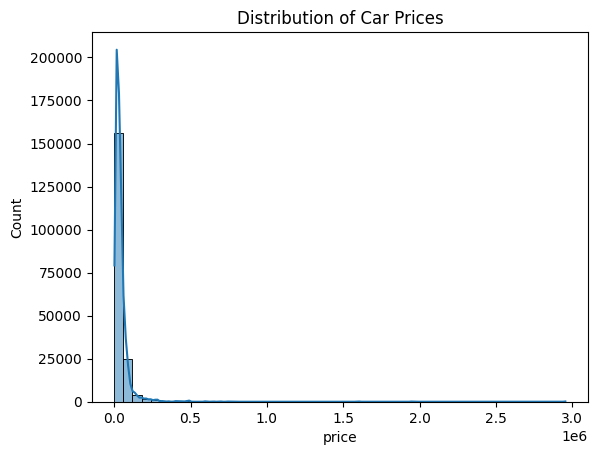

In [504]:
# Plot Car Price Distribution
plt.figure()
sns.histplot(train_clean["price"], bins= 50, kde= True)
plt.title("Distribution of Car Prices")
plt.show()

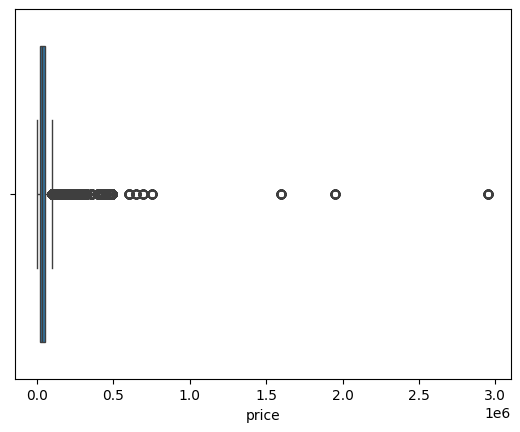

In [505]:
plt.figure()
sns.boxplot(x= train_clean["price"])
plt.show()

We can see that there a few outliers in the price column

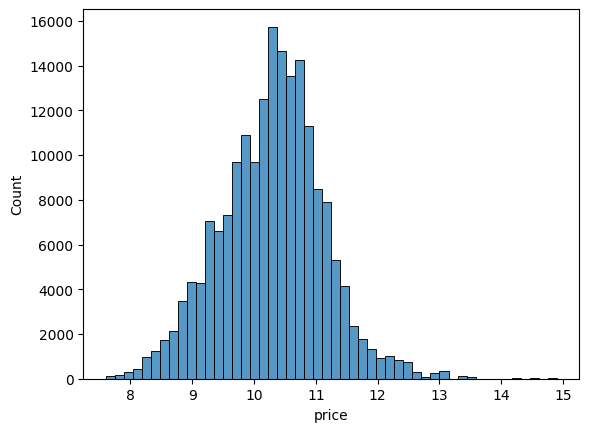

In [506]:
# Let's use log transform to confirm the outliers
plt.figure()
sns.histplot(np.log1p(train_clean["price"]), bins=50)
plt.show()

In [507]:
# Check for one of the outlier rows to understand the data, e.g, check for 54598 row
outlier_row= train_clean[train_clean["price"] == 54598]
outlier_row

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
8431,8431,Acura,MDX w/Advance Package,2023,30177,Gasoline,3.5 Liter SOHC,Automatic,White,Brown,None reported,54598
11877,11877,Mercedes-Benz,AMG G 63 Base,2020,29136,Gasoline,4.0 Liter Twin Turbo,Automatic,White,Black,None reported,54598
13145,13145,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,37426,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Automatic,Blue,Blue,None reported,54598
17402,17402,Volkswagen,Arteon 2.0T SEL R-Line,2022,18533,Gasoline,2.0 Liter Turbo,Automatic,Silver,Black,None reported,54598
18502,18502,Audi,SQ5 3.0T Premium Plus,2022,47729,Gasoline,3.0 Liter TFSI,Automatic,White,Brown,None reported,54598
20632,20632,Porsche,Taycan,2021,6930,Gasoline,Electric,Automatic,White,Red,None reported,54598
24023,24023,Mercedes-Benz,GLC 300 GLC 300,2022,8193,Gasoline,2.0 Liter Turbo,Automatic,Black,Beige,None reported,54598
27458,27458,Toyota,Avalon Hybrid XLE Premium,2022,30177,Hybrid,3.5 Liter,Automatic,Blue,Beige,None reported,54598
27732,27732,Lexus,CT 200h Premium,2023,6682,Hybrid,2.0 Liter DOHC T/C,CVT,Gray,Black,None reported,54598
42370,42370,Mercedes-Benz,AMG GLC 43 AMG GLC 43,2019,39102,Gasoline,4.0 Liter Twin Turbo,Automatic,Black,Black,None reported,54598


In [508]:
outlier_row= train_clean[train_clean["price"] == 60998]
outlier_row

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
1792,1792,Lexus,RX 350 RX 350 F SPORT Handling,2022,21478,Gasoline,3.5 Liter DOHC,Automatic,Black,Black,None reported,60998
3580,3580,Audi,A8 4.0,2020,3959,Gasoline,3.0 Liter Turbo,Automatic,Black,Black,None reported,60998
10532,10532,Mercedes-Benz,GLS 450 Base 4MATIC,2022,4665,Hybrid,3.0 Liter Turbo,Automatic,Silver,Black,None reported,60998
23416,23416,Porsche,Macan S,2022,19701,Gasoline,3.0 Liter Turbo,Automatic,Gray,Black,None reported,60998
24550,24550,BMW,M760 i xDrive,2020,8193,Gasoline,6.6 Liter Twin Turbo,Automatic,White,Black,None reported,60998
28181,28181,Tesla,Model Y Long Range,2020,25361,Gasoline,Dual Motor - Standard,Automatic,Black,Black,None reported,60998
29307,29307,Land,Rover Range Rover P400 SE SWB,2019,4648,Hybrid,3.0 Liter Turbo,Automatic,White,White,None reported,60998
29494,29494,BMW,ALPINA B7 ALPINA B7 xDrive,2020,4665,Gasoline,4.4 Liter Twin Turbo,Automatic,Black,Black,None reported,60998
31128,31128,Land,Rover Range Rover Autobiography,2023,16701,Hybrid,4.4 Liter,Automatic,White,Black,None reported,60998
34128,34128,Jeep,Wrangler Rubicon Hard Rock,2022,31678,Gasoline,3.6 Liter DOHC,Automatic,Red,Black,None reported,60998


No need to remove the outliers since they are small and they account for true values of the car feature

In [509]:
train_clean["fuel_type"].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       'not supported'], dtype=object)

### Fuel Type Plots

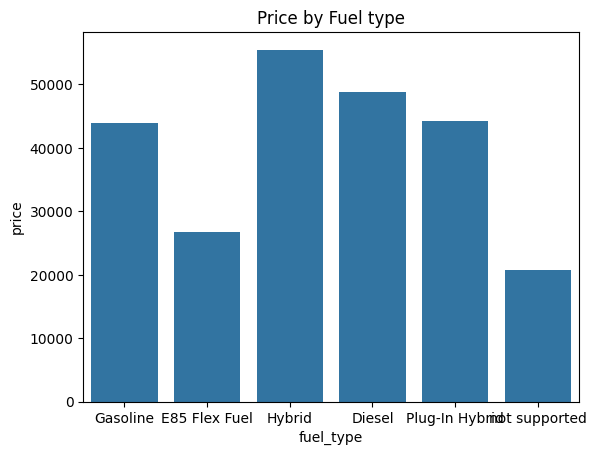

In [510]:
# Plot for Fuel_type vs Price
plt.figure()
sns.barplot(x= "fuel_type", y= "price", data= train_clean, errorbar=None)
plt.title("Price by Fuel type")
plt.show()

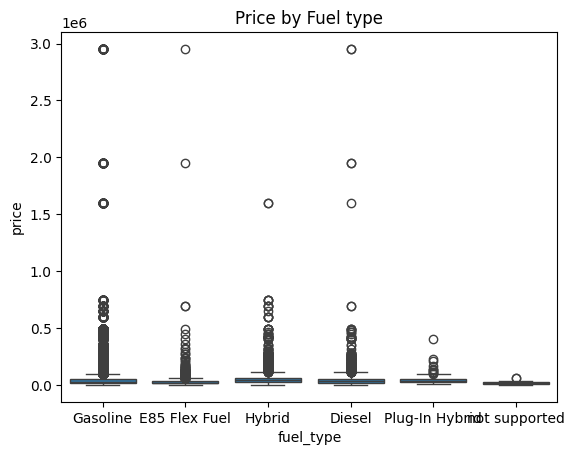

In [511]:
# Plot for Fuel_type vs Price
plt.figure()
sns.boxplot(x= "fuel_type", y= "price", data= train_clean)
plt.title("Price by Fuel type")
plt.show()

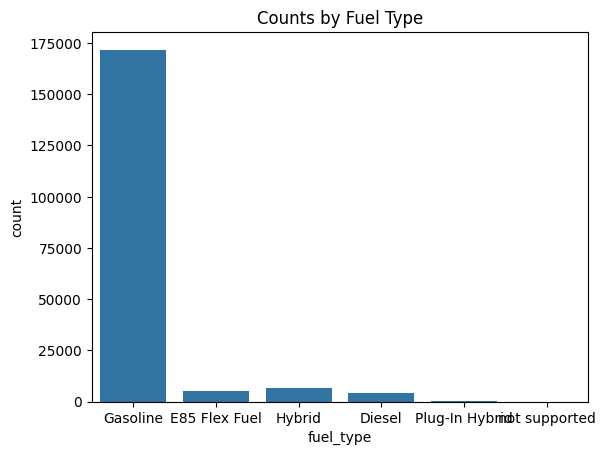

In [512]:
# Fuel Type
plt.figure()
sns.countplot(x="fuel_type", data=train_clean)
plt.title("Counts by Fuel Type")
plt.show()

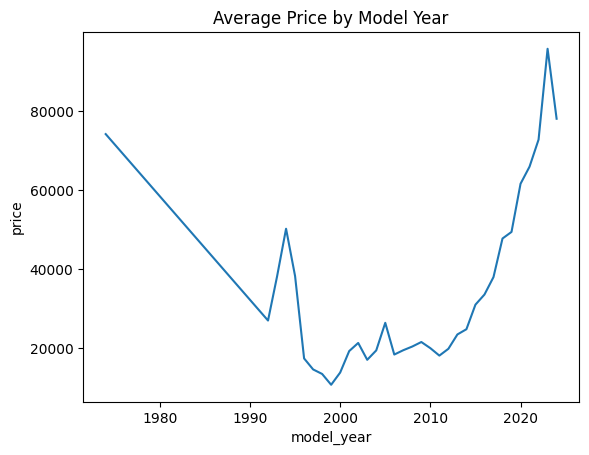

In [513]:
# Plot Model_year vs Price
plt.figure()
sns.lineplot(x="model_year", y="price", data=train_clean, estimator="mean", errorbar=None)
plt.title("Average Price by Model Year")
plt.show()

### Brand Plots

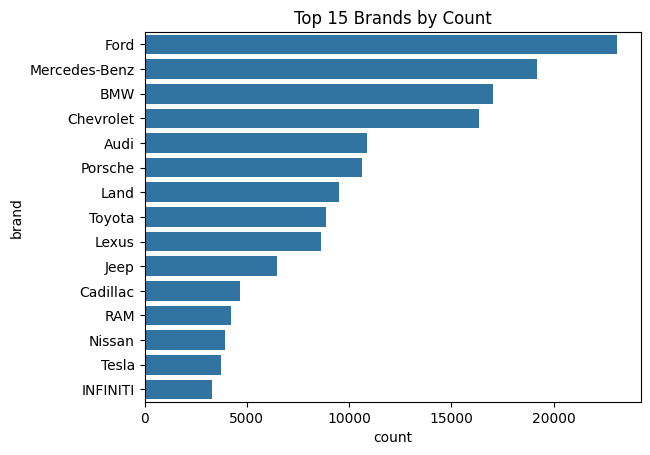

In [514]:
# Brand
plt.figure()
top_brands = train_clean["brand"].value_counts().nlargest(15).index
sns.countplot(y="brand", data=train_clean[train_clean["brand"].isin(top_brands)],
              order=top_brands)
plt.title("Top 15 Brands by Count")
plt.show()


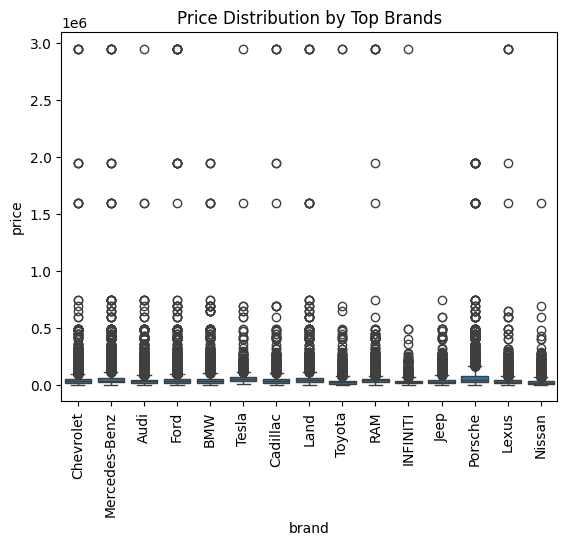

In [515]:
plt.figure()
sns.boxplot(x="brand", y="price", data=train_clean[train_clean["brand"].isin(top_brands)])
plt.xticks(rotation=90)
plt.title("Price Distribution by Top Brands")
plt.show()

### Mileage

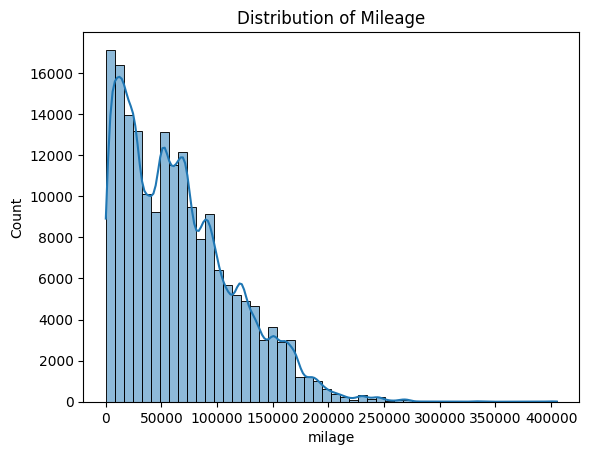

In [516]:
# Mileage
plt.figure()
sns.histplot(train_clean["milage"], bins=50, kde=True)
plt.title("Distribution of Mileage")
plt.show()



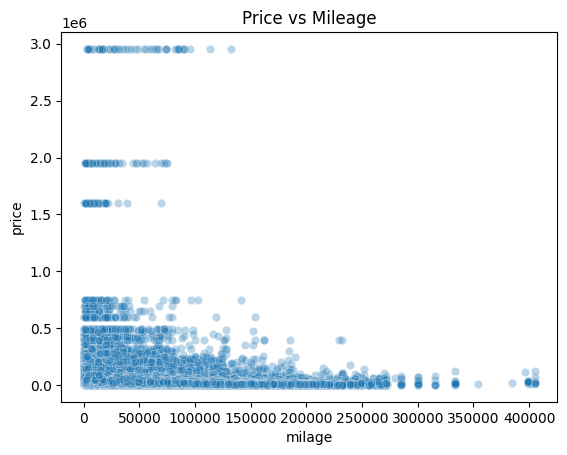

In [517]:
plt.figure()
sns.scatterplot(x="milage", y="price", data=train_clean, alpha=0.3)
plt.title("Price vs Mileage")
plt.show()

### Transmission

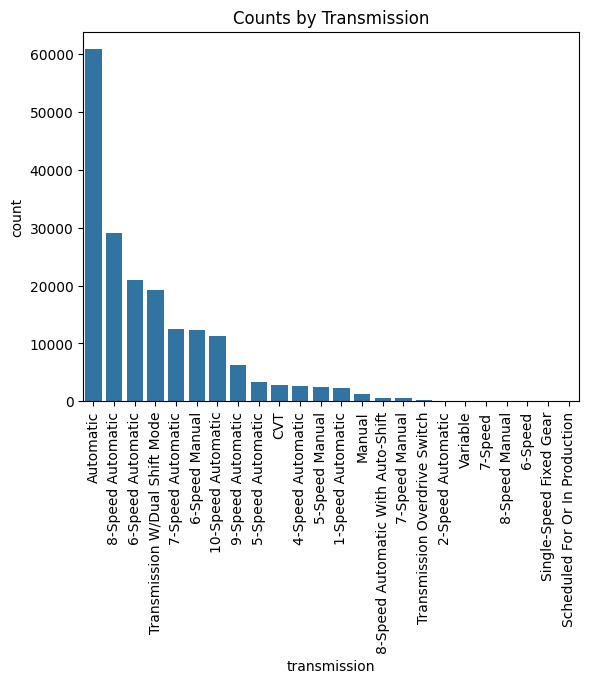

In [518]:
plt.figure()
sns.countplot(x="transmission", data=train_clean, order=train_clean["transmission"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Counts by Transmission")
plt.show()

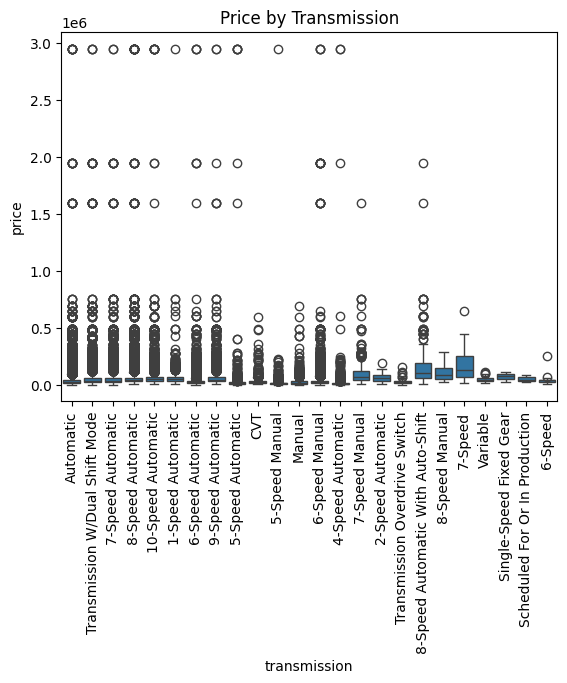

In [519]:

plt.figure()
sns.boxplot(x="transmission", y="price", data=train_clean)
plt.xticks(rotation=90)
plt.title("Price by Transmission")
plt.show()


### Exterior & Interior Colour Plot

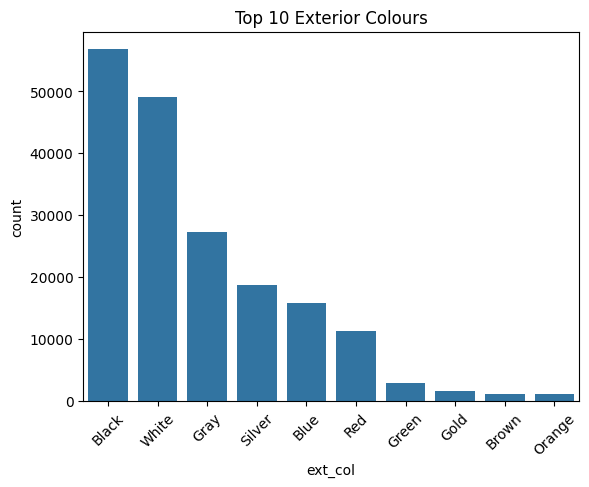

In [520]:
plt.figure()
top_colors = train_clean["ext_col"].value_counts().nlargest(10).index
sns.countplot(x="ext_col", data=train_clean[train_clean["ext_col"].isin(top_colors)],
              order=top_colors)
plt.xticks(rotation=45)
plt.title("Top 10 Exterior Colours")
plt.show()

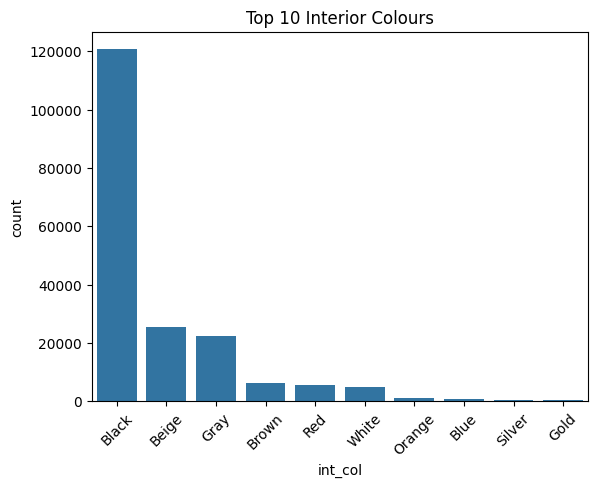

In [521]:
# Interior Color
plt.figure()
top_int_colors = train_clean["int_col"].value_counts().nlargest(10).index
sns.countplot(x="int_col", data=train_clean[train_clean["int_col"].isin(top_int_colors)],
              order=top_int_colors)
plt.xticks(rotation=45)
plt.title("Top 10 Interior Colours")
plt.show()

### Accident Plot

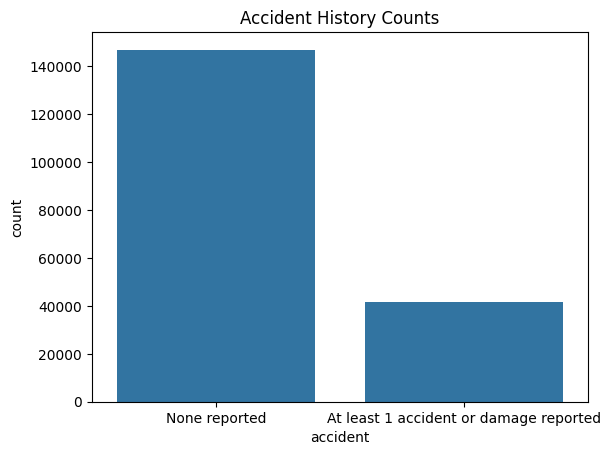

In [522]:
plt.figure()
sns.countplot(x="accident", data=train_clean)
plt.title("Accident History Counts")
plt.show()



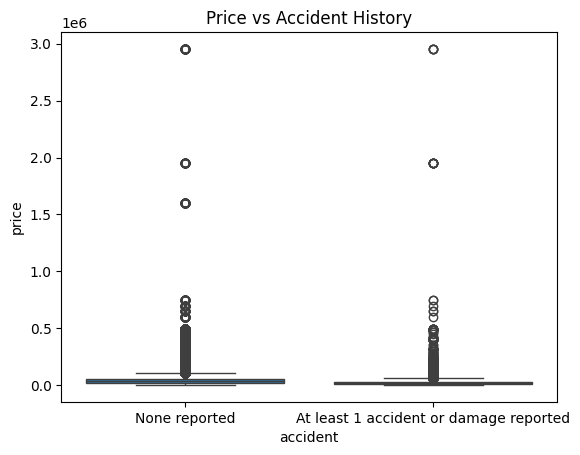

In [523]:
plt.figure()
sns.boxplot(x="accident", y="price", data=train_clean)
plt.title("Price vs Accident History")
plt.show()

### Correlation Heatmap or Plots

In [524]:
numeric_cols = ["price", "milage", "model_year"]

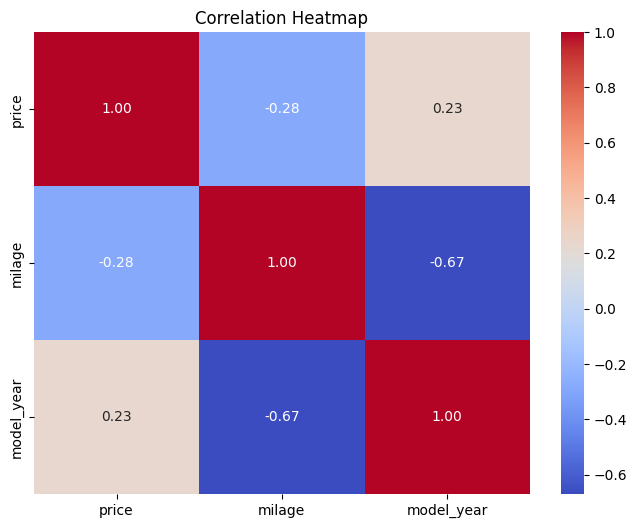

In [525]:
plt.figure(figsize=(8,6))
sns.heatmap(train_clean[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

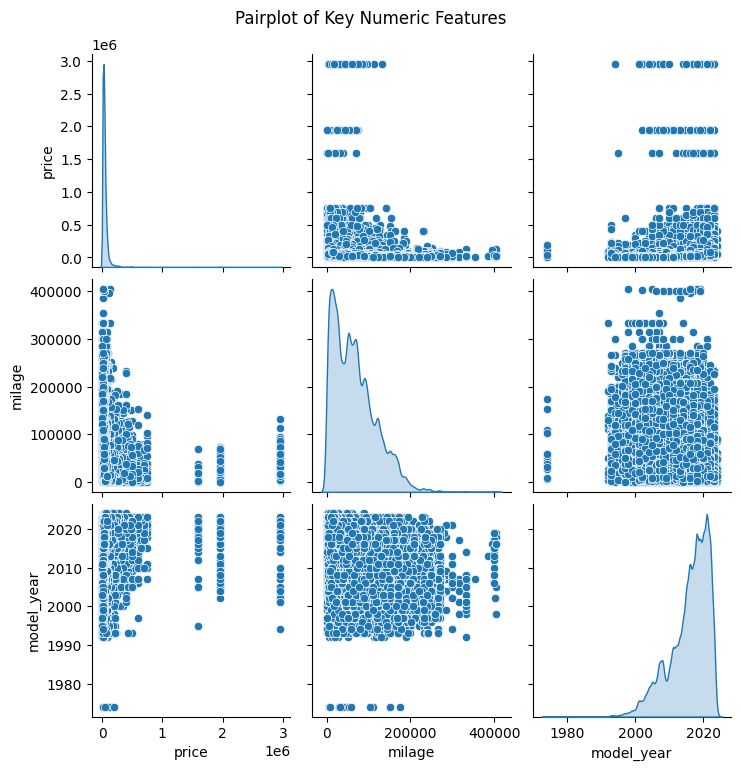

In [526]:
# Pairplot (subset of numeric)
sns.pairplot(train_clean[numeric_cols], diag_kind="kde")
plt.suptitle("Pairplot of Key Numeric Features", y=1.02)
plt.show()

/tmp/ipykernel_10/3256051045.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="fuel_type", y="price", hue="transmission",


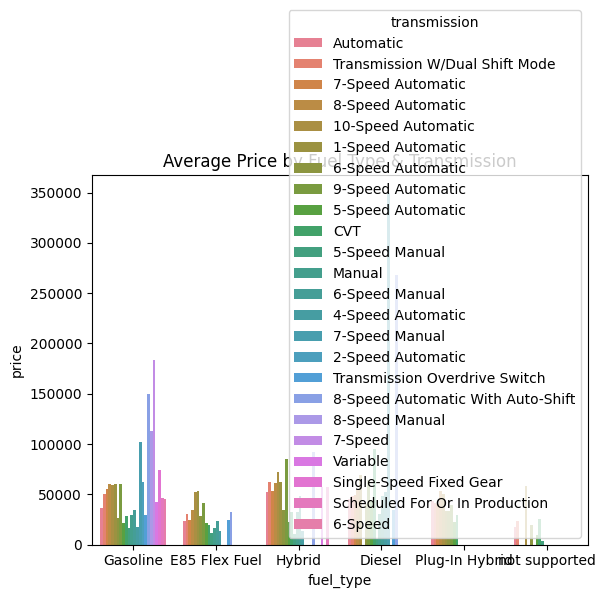

In [527]:
plt.figure()
sns.barplot(x="fuel_type", y="price", hue="transmission", 
            data=train_clean, estimator="mean", ci=None)
plt.title("Average Price by Fuel Type & Transmission")
plt.show()

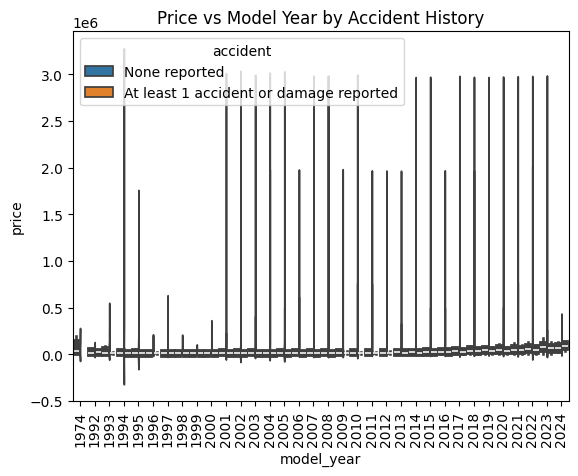

In [528]:
plt.figure()
sns.violinplot(x="model_year", y="price", hue="accident", 
               data=train_clean, split=True)
plt.xticks(rotation=90)
plt.title("Price vs Model Year by Accident History")
plt.show()

## Prepare Data for Model Training 

In [529]:
import pandas as pd
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor #or any model of your choice
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [530]:
# Import the data again
train= pd.read_csv("/kaggle/working/train_clean.csv")
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,Automatic,Yellow,Gray,None reported,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,Automatic,Silver,Beige,At least 1 accident or damage reported,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Automatic,Blue,Gray,None reported,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission W/Dual Shift Mode,Black,Black,None reported,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed Automatic,Black,Beige,None reported,97500


In [531]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     188533 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      188533 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 17.3+ MB


In [532]:
# Encode categorical data using Label Encoder
def label_encode(df):
    categorical_col= ["brand", "model", "fuel_type", "engine", "transmission", "ext_col", "int_col", "accident"] 
    le= LabelEncoder()
    
    for col in categorical_col:
        df[col]= le.fit_transform(df[col])
        print(f"Successfully endcoded: {col}")
    return df


In [533]:
train = label_encode(train)


Successfully endcoded: brand
Successfully endcoded: model
Successfully endcoded: fuel_type
Successfully endcoded: engine
Successfully endcoded: transmission
Successfully endcoded: ext_col
Successfully endcoded: int_col
Successfully endcoded: accident


In [567]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     125690 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      125690 non-null  object
dtypes: int64(3), object(8)
memory usage: 10.5+ MB


In [534]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            188533 non-null  int64
 1   brand         188533 non-null  int64
 2   model         188533 non-null  int64
 3   model_year    188533 non-null  int64
 4   milage        188533 non-null  int64
 5   fuel_type     188533 non-null  int64
 6   engine        188533 non-null  int64
 7   transmission  188533 non-null  int64
 8   ext_col       188533 non-null  int64
 9   int_col       188533 non-null  int64
 10  accident      188533 non-null  int64
 11  price         188533 non-null  int64
dtypes: int64(12)
memory usage: 17.3 MB


In [535]:
# Split to X and y
X= train.drop("price", axis=1)
y = train["price"]
X.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident
0,0,31,495,2007,213000,2,116,16,13,5,1
1,1,28,930,2002,143250,2,366,16,11,0,0
2,2,9,1575,2002,136731,1,640,16,2,5,1
3,3,16,758,2017,19500,2,863,22,1,1,1
4,4,36,1077,2021,7388,2,259,10,1,0,1


In [564]:
X.shape

(188533, 11)

In [536]:
y.head()

0     4200
1     4999
2    13900
3    45000
4    97500
Name: price, dtype: int64

In [537]:
# Split X and y to 80:20 ratio for training and validation
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size =0.2, random_state= 42)

In [538]:
X_train.shape, y_train.shape

((150826, 11), (150826,))

In [539]:
X_val.shape, y_val.shape

((37707, 11), (37707,))

## Model Training

First train only with default hyperparameters

In [540]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [541]:
import numpy as np 
y_val_pred = model.predict(X_val)

val_rmse = mean_squared_error(y_val, y_val_pred)
val_rmse= np.sqrt(val_rmse)

print("Validation RMSE:", val_rmse)

Validation RMSE: 72099.99934815588


Now, use Grid search method to know the best hyperparameters for training

In [586]:
def train_with_cv(estimator, param_grid, X, y, cv_splits=6, scoring=None):
    """
    Perform K-Fold Cross Validation with hyperparameter tuning. Adjust params as you please

    Parameters:
    estimator : sklearn estimator
        The model to train (e.g., RandomForestRegressor(), LogisticRegression(), etc.)
    param_grid : dict
        Hyperparameter search space, e.g., {'n_estimators': [100, 200], 'max_depth': [5, 10]}
    X : Features
    y : Target variable
    cv_splits : int
        Number of folds for cross-validation
    scoring : str or callable
        Scoring metric (default: neg_root_mean_squared_error for regression)
    """
    # default scoring = RMSE for regression
    if scoring is None:
        scoring = make_scorer(mean_squared_error, squared=False)

    kfold = KFold(n_splits=cv_splits, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X, y)

    return grid_search.best_estimator_, grid_search.best_params_, grid_search.cv_results_

In [587]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

best_model, best_params, cv_results = train_with_cv(model, param_grid, X_train, y_train)

print("Best Params:", best_params)

Fitting 6 folds for each of 12 candidates, totalling 72 fits


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

Best Params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [588]:
y_val_pred = best_model.predict(X_val)

val_rmse = mean_squared_error(y_val, y_val_pred)
val_rmse= np.sqrt(val_rmse)

print("Validation RMSE:", val_rmse)

Validation RMSE: 68967.27407906875


In [589]:
final_model = RandomForestRegressor(**best_params,random_state=42)

final_model.fit(
    np.vstack([X_train, X_val]), 
    np.hstack([y_train, y_val])
)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluate Model on Test Data

In [590]:
# Load X_test data
test_df = pd.read_csv('/kaggle/input/hackathon-qualification/archive/test.csv')
print("Test Data loaded successfully!")

Test Data loaded successfully!


In [591]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [550]:
# Save Clean Test Dataframe
test_clean= clean_dataframe(test_df)
# test_clean= filling_missing_values_in_categorical_columns(test_clean)
# test_clean.isnull().sum()

/tmp/ipykernel_10/3461477170.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [592]:
file_path= "/kaggle/working/test_clean.csv"
test_clean.to_csv(file_path, index= False)
print(f"Clean Test dataframe successfully saved to: {file_path}")

Clean Test dataframe successfully saved to: /kaggle/working/test_clean.csv


In [593]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [594]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            125690 non-null  int64
 1   brand         125690 non-null  int64
 2   model         125690 non-null  int64
 3   model_year    125690 non-null  int64
 4   milage        125690 non-null  int64
 5   fuel_type     125690 non-null  int64
 6   engine        125690 non-null  int64
 7   transmission  125690 non-null  int64
 8   ext_col       125690 non-null  int64
 9   int_col       125690 non-null  int64
 10  accident      125690 non-null  int64
dtypes: int64(11)
memory usage: 10.5 MB


In [595]:
X_test= label_encode(test_clean)

Successfully endcoded: brand
Successfully endcoded: model
Successfully endcoded: fuel_type
Successfully endcoded: engine
Successfully endcoded: transmission
Successfully endcoded: ext_col
Successfully endcoded: int_col
Successfully endcoded: accident


In [596]:
X_test.shape

(125690, 11)

In [597]:
y_test_pred = final_model.predict(X_test)
y_test_pred[0:5]

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([17410.66880821, 79836.56232378, 65205.50925823, 23766.55789072,
       31474.45163666])

In [603]:
submission2=pd.DataFrame({"id":X_test['id'],"Price":y_test_pred})
file_path = "/kaggle/working/submission2.csv"
submission2.to_csv(file_path,index=False)

In [604]:
submission2

,id,Price
0,188533,17410.668808
1,188534,79836.562324
2,188535,65205.509258
3,188536,23766.557891
4,188537,31474.451637
...,...,...
125685,314218,28854.876560
125686,314219,64875.477722
125687,314220,26074.823826
125688,314221,13890.731570
